<a href="https://colab.research.google.com/github/rpizarrog/analitica_de_datos/blob/main/python/Caso_01_Cargar_datos_de_un_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Cargar un conjunto de datos y transformar para dejar datos limpios


# Descripción

* Identificar una ruta en donde se encuentra un archivo en formato CSV que define dos variables de interés, *edades* y *generos* Masculino o Femenino.
* Se cargan las funciones adecuadas.
* Se cargan las librerías.
* Se identifican datos sucios en el conjunto de datos.
* Se transforman los datos de la variable edades de la siguiente manera:
  * La variable se convierte a numérico y aquel que no sea número se le ponde la etiqueta NaN.
  * Se convierte a valores absolutos.
  * Al calcular la mediana se modifican los valores NaN a valor de la mediana
  * Con el diagrama de caja se identifican datos atípicos.
  * Se observa histograma de las edades
* Se transorma la variable *generos*:
  * Convertir todos los valores
  a mayúsculas para estandarizar
  * Los registros que no tengan valor óner la moda de los valores.
  * Si hay un parecido en el *string* poner lo que se le parezca.



# Desarrollo


## Cargar librerías


In [132]:
import pandas as pd
import numpy as np
from collections import Counter as Counter
import math

import matplotlib.pyplot as plt # Para visualizar datos

## Crear funciones

Funciones para limpiar datos


In [133]:
# Definir la función que convierte una lista o arreglo a valores numéricos
def f_convertir_numeros(valores):
    # Convertir los valores a numéricos, forzando los no convertibles a NaN
    numericos = pd.to_numeric(valores, errors='coerce')
    return numericos

# Definen una función que convierte valores numéricos a valores absolutos
def f_convertir_absoluto (valores):
  return np.abs(valores)

# Función median con pandas la función median()
def f_mediana(valores):
  # Mediana excluyendo
  mediana = valores.median()
  return mediana

def f_convertir_mediana(valores):
    # Convertir la entrada a una Serie de Pandas si no lo es
    if not isinstance(valores, pd.Series):
        valores = pd.Series(valores)

    # Convertir todos los valores a numéricos, forzando los no convertibles a NaN
    valores_numericos = pd.to_numeric(valores, errors='coerce')

    # Calcular la mediana de los valores numéricos, excluyendo los NaN
    mediana = valores_numericos.median()

    # Reemplazar los NaN con la mediana
    numeros = valores_numericos.fillna(mediana)

    return numeros


# Función que visualzia histogrma de una variable de interés numérica
def f_histograma(numeros, contexto):
  # Calular l media
  media = np.mean(numeros)
  # Calcular la mediana
  mediana = np.median(numeros)

  desviacion_estandar = np.std(numeros, ddof=1)
  plt.hist(numeros, bins=8, edgecolor='k', alpha=0.7)
  plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
  plt.axvline(mediana, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana = {mediana:.2f}')
  plt.axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=2, label=f'Desv. Estándar = {desviacion_estandar:.2f}')
  plt.axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=2)
  plt.title('Histograma de ' + contexto + ' con media y desviación estándar')
  plt.xlabel(contexto)
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.show()

# Función que determina cuartiles
def f_cuartiles_quantile(datos):
  q1 = np.percentile(datos, 25)
  q2 = np.percentile(datos, 50)
  q3 = np.percentile(datos, 75)
  return q1, q2, q3

# Función que construye diagrama de caja
def f_diagrama_caja (datos, contexto):
  plt.boxplot(datos, vert=False)
  plt.xlabel(contexto)
  plt.ylabel('Valor')
  plt.title('Diagrama de Caja')

  # Calculando cuartiles d ela funci´pn previamente creada
  q1, q2, q3= f_cuartiles_quantile(datos)
  # Añadir leyendas para los cuartiles
  plt.axvline(x=q1, color='blue', linestyle='--', linewidth=1, label=f'Q1: {q1:.2f}')
  plt.axvline(x=q2, color='blue', linestyle='--', linewidth=1, label=f'Q2:Mediana: {q2:.2f}')
  plt.axvline(x=q3, color='blue', linestyle='--', linewidth=1, label=f'Q3: {q3:.2f}')

  # Añadir leyenda adicional
  plt.legend()

  plt.show()

def f_modificar_atipicos (datos):

  datos = np.array(datos)
  q1, q2, q3 = f_cuartiles_quantile(datos)

  # La mediana
  mediana = np.median(datos)

  # Rango Intercuartílico RI = q3 - q1
  RI = q3 - q1

  # Definir los límites para los valores atípicos
  limite_inferior = q1 - 1.5 * RI
  limite_superior = q3 + 1.5 * RI

  # Calcular la mediana
  mediana = np.median(datos)

  # Reemplazar los valores atípicos por la mediana
  datos[(datos < limite_inferior) | (datos > limite_superior)] = mediana

  return datos


# Convertir todos los valores a mayúsculas para estandarizar la columna.
def f_convertir_MAYUSCULAS(valores):
  # 1. Convertir todos los valores a mayúsculas
  valores = valores.str.upper()
  return valores

def f_reemplazar_generos_moda (valores):
  moda_generos = valores.mode()[0]

  valores.fillna(moda_generos, inplace=True)

  return valores

# Función que debe modifiar un valor de acuerdo a la cadena que mas se le parezca
def f_modificar_parecido (valores):
  # Debe identificar los valores únicos los dos que mas se repitan
  # por ejemplo FEMENINO Y MASCULINO
  # De cada valor si hay una ler F es FEMENINO
  # De cada valor si hay una ler M es MASCULINO
  # De cada valor si se parece por ejemplo GEMENINO se parece a FEMENINO
  # De cada valor si se parece por ejemplo SASCULINO se parece a MASCULINO
  return valores



## Cargar datos

Se cargan datos sucios

In [134]:

# Especificar la ruta al archivo CSV, puede ser una ruta URL
ruta_archivo = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/datos_estudiantes_sucios.csv"

# o # Especificar la ruta al archivo CSV, puede ser una ruta local de la computadora
# Define la ruta al archivo CSV
# C:\Users\rpizarro\Documents\Semestre Enero Junio 2024\AnaLItica de datos en las organizaciones\datos
#ruta_archivo = r"C:\Users\rpizarro\Documents\Semestre Enero Junio 2024\AnaLItica de datos en las organizaciones\datos\datos_estudiantes_sucios.csv"


# Cargar los datos en un DataFrame
datos_sucios = datos_limpios = pd.read_csv(ruta_archivo)

print (datos_sucios)

            edades    generos
0               13   Femenino
1   cuarenta y dos  Masculino
2               25  Masculino
3               29        NaN
4               13  Masculino
5               -8        NaN
6               11  Masculino
7               42   FEMENINO
8               -9   Femenino
9               13  Masculino
10              33   Femenino
11              19  Masculino
12              27  Masculino
13              -9  Masculino
14              49          M
15            diez   FEMENINO
16              22   FEMENINO
17               1   FEMENINO
18              47  Masculino
19              11   FEMENINO
20              33  Masculino
21              14  Masculino
22              38  Masculino
23              16   Femenino
24              48   Femenino
25              31   Femenino
26              17   FEMENINO
27              49   Femenino
28               5   Femenino
29               4  Masculino
30              36  Masculino
31              40   FEMENINO
32        

## Transformar conjunto de datos

### Convertir a numéricos las edades



In [135]:
datos_limpios['edades'] = f_convertir_numeros(datos_limpios['edades'])
datos_limpios['edades'] = f_convertir_absoluto(datos_limpios['edades'])
print (datos_limpios)



    edades    generos
0     13.0   Femenino
1      NaN  Masculino
2     25.0  Masculino
3     29.0        NaN
4     13.0  Masculino
5      8.0        NaN
6     11.0  Masculino
7     42.0   FEMENINO
8      9.0   Femenino
9     13.0  Masculino
10    33.0   Femenino
11    19.0  Masculino
12    27.0  Masculino
13     9.0  Masculino
14    49.0          M
15     NaN   FEMENINO
16    22.0   FEMENINO
17     1.0   FEMENINO
18    47.0  Masculino
19    11.0   FEMENINO
20    33.0  Masculino
21    14.0  Masculino
22    38.0  Masculino
23    16.0   Femenino
24    48.0   Femenino
25    31.0   Femenino
26    17.0   FEMENINO
27    49.0   Femenino
28     5.0   Femenino
29     4.0  Masculino
30    36.0  Masculino
31    40.0   FEMENINO
32    33.0  Masculino
33    44.0          F
34    41.0   FEMENINO
35    46.0  Masculino
36     8.0  Masculino
37    26.0   FEMENINO
38    40.0  Masculino
39     4.0   FEMENINO
40    10.0   FEMENINO
41     2.0  Masculino
42    28.0   Femenino
43    99.0  Masculino
44     7.0

### La mediana

Se manda llamar la funci´pn para concoer la mediana como un esta´distico que servirá para actualizar cada valor no numérico a su valor de la mediana

In [136]:
# Mediana excluyendo
mediana = f_mediana(datos_limpios['edades'])
print (mediana)



25.5


### Convertir valores de edades NaN a valor de mediana

Se utiliza la función *f_convertir_mediana()*


In [137]:
datos_limpios['edades'] = f_convertir_mediana(datos_limpios['edades'])
print (datos_limpios)


    edades    generos
0     13.0   Femenino
1     25.5  Masculino
2     25.0  Masculino
3     29.0        NaN
4     13.0  Masculino
5      8.0        NaN
6     11.0  Masculino
7     42.0   FEMENINO
8      9.0   Femenino
9     13.0  Masculino
10    33.0   Femenino
11    19.0  Masculino
12    27.0  Masculino
13     9.0  Masculino
14    49.0          M
15    25.5   FEMENINO
16    22.0   FEMENINO
17     1.0   FEMENINO
18    47.0  Masculino
19    11.0   FEMENINO
20    33.0  Masculino
21    14.0  Masculino
22    38.0  Masculino
23    16.0   Femenino
24    48.0   Femenino
25    31.0   Femenino
26    17.0   FEMENINO
27    49.0   Femenino
28     5.0   Femenino
29     4.0  Masculino
30    36.0  Masculino
31    40.0   FEMENINO
32    33.0  Masculino
33    44.0          F
34    41.0   FEMENINO
35    46.0  Masculino
36     8.0  Masculino
37    26.0   FEMENINO
38    40.0  Masculino
39     4.0   FEMENINO
40    10.0   FEMENINO
41     2.0  Masculino
42    28.0   Femenino
43    99.0  Masculino
44     7.0

## Histograma de edades



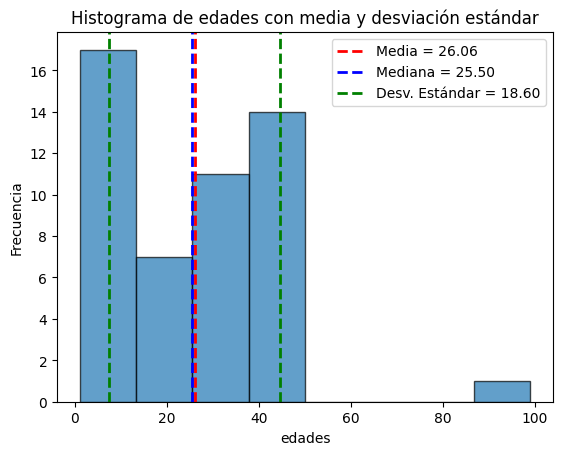

In [138]:

f_histograma(datos_limpios['edades'], 'edades')

## Diagrama de caja

Se utiliza el diagrama de caja para verificar datos atípicos



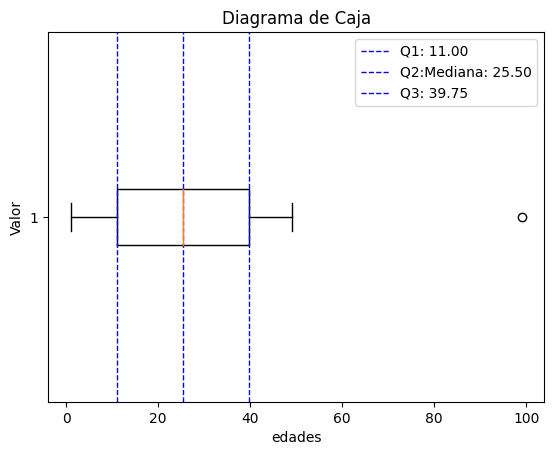

In [139]:
f_diagrama_caja(datos_limpios['edades'], 'edades')

Se observa en el diagrama de caja que existen datos atípicos, se recomienda modificar ese valor por el valor de la mediana de la variable numérica en cuestión.



Datos Limpios Finales
    edades    generos
0     13.0   Femenino
1     25.5  Masculino
2     25.0  Masculino
3     29.0        NaN
4     13.0  Masculino
5      8.0        NaN
6     11.0  Masculino
7     42.0   FEMENINO
8      9.0   Femenino
9     13.0  Masculino
10    33.0   Femenino
11    19.0  Masculino
12    27.0  Masculino
13     9.0  Masculino
14    49.0          M
15    25.5   FEMENINO
16    22.0   FEMENINO
17     1.0   FEMENINO
18    47.0  Masculino
19    11.0   FEMENINO
20    33.0  Masculino
21    14.0  Masculino
22    38.0  Masculino
23    16.0   Femenino
24    48.0   Femenino
25    31.0   Femenino
26    17.0   FEMENINO
27    49.0   Femenino
28     5.0   Femenino
29     4.0  Masculino
30    36.0  Masculino
31    40.0   FEMENINO
32    33.0  Masculino
33    44.0          F
34    41.0   FEMENINO
35    46.0  Masculino
36     8.0  Masculino
37    26.0   FEMENINO
38    40.0  Masculino
39     4.0   FEMENINO
40    10.0   FEMENINO
41     2.0  Masculino
42    28.0   Femenino
43    25.5

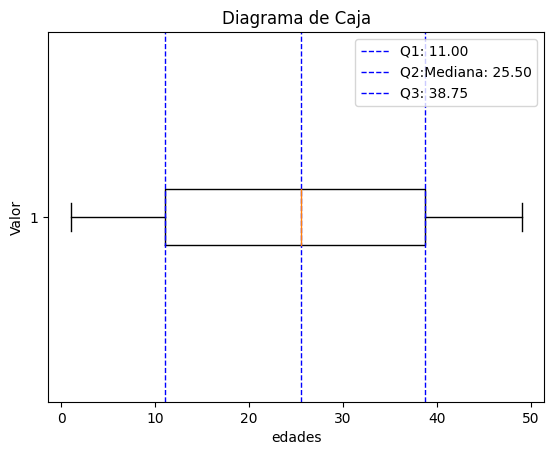

In [140]:
datos_limpios['edades'] = f_modificar_atipicos(datos_limpios['edades'])
print ("Datos Limpios Finales")
print (datos_limpios)

# Verificar si se modifiacron os datos atípicos
f_diagrama_caja(datos_limpios['edades'], 'edades')


Ya no hay datos atípicos.


## Transformar valores de generos

### Cambiar a mayúsculas



In [141]:
datos_limpios['generos'] = f_convertir_MAYUSCULAS(datos_limpios['generos'])
print (datos_limpios)

datos_limpios['generos'] = f_reemplazar_generos_moda(datos_limpios['generos'])
print (datos_limpios)
# PEndiente ...

    edades    generos
0     13.0   FEMENINO
1     25.5  MASCULINO
2     25.0  MASCULINO
3     29.0        NaN
4     13.0  MASCULINO
5      8.0        NaN
6     11.0  MASCULINO
7     42.0   FEMENINO
8      9.0   FEMENINO
9     13.0  MASCULINO
10    33.0   FEMENINO
11    19.0  MASCULINO
12    27.0  MASCULINO
13     9.0  MASCULINO
14    49.0          M
15    25.5   FEMENINO
16    22.0   FEMENINO
17     1.0   FEMENINO
18    47.0  MASCULINO
19    11.0   FEMENINO
20    33.0  MASCULINO
21    14.0  MASCULINO
22    38.0  MASCULINO
23    16.0   FEMENINO
24    48.0   FEMENINO
25    31.0   FEMENINO
26    17.0   FEMENINO
27    49.0   FEMENINO
28     5.0   FEMENINO
29     4.0  MASCULINO
30    36.0  MASCULINO
31    40.0   FEMENINO
32    33.0  MASCULINO
33    44.0          F
34    41.0   FEMENINO
35    46.0  MASCULINO
36     8.0  MASCULINO
37    26.0   FEMENINO
38    40.0  MASCULINO
39     4.0   FEMENINO
40    10.0   FEMENINO
41     2.0  MASCULINO
42    28.0   FEMENINO
43    25.5  MASCULINO
44     7.0